# Data Analysis and Data Science
## Putting it all together

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 7th 2022

<hr style="border:1px solid black"> </hr>


In [8]:
#Name: Xinyue_Wang

In [18]:
### Import sklearn
import sklearn.decomposition
import sklearn.cluster
import random
### Import scipy
import scipy

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Data Analysis II: k-means for clustering datapoints

In [4]:
### Import and clean the penguins dataset
data_penguin = pd.read_csv("palmer_penguins.csv", sep=",", header=0)
data_penguin.dropna(axis="index", inplace=True)
data_penguin = data_penguin.reset_index(drop=True)

In [5]:
### Do dimensionality reduction through PCA
X = data_penguin.iloc[:, 2:6]

# Data scaling
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) 

# Initiate the PCA and apply it to the scaled data
pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(X_scaled)

# Apply the dimensionality reduction to our data
X_reduce = pca.fit_transform(X_scaled)

reduce_penguin = pd.DataFrame(X_reduce)
reduce_penguin["species"] = data_penguin.species
reduce_penguin["island"] = data_penguin.island
reduce_penguin["sex"] = data_penguin.sex

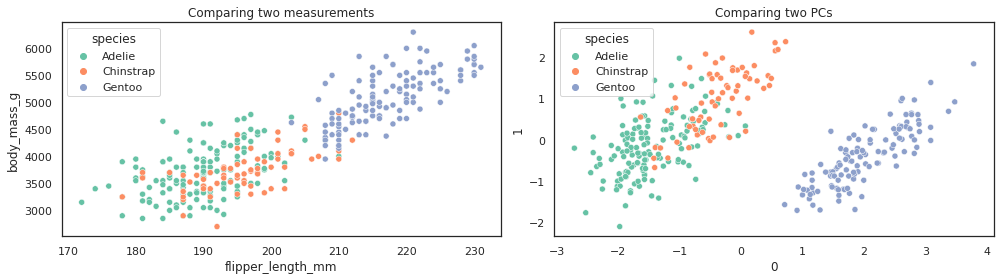

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.scatterplot(data=data_penguin, x="flipper_length_mm", y="body_mass_g", hue="species", ax=ax[0])
ax[0].set_title("Comparing two measurements")

sns.scatterplot(data=reduce_penguin, x=0, y=1, hue="species", ax=ax[1])
ax[1].set_title("Comparing two PCs")

plt.tight_layout()
plt.show()

We wish to group similar samples and compare the groups to catagorical labels.

### k-means with scikit-learn

The KMeans algorithm clusters data by trying to separate samples in $n$ groups of equal variance, minimizing a criterion known as **within-cluster sum-of-squares**.

This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

At a glance, the k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_{j}$ of the samples in the cluster $C_{j}$. 

*In very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.*

Ressource: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

Let's apply the k-means algorithm to the first two principal component of the Iris dataset. **Are we able to cluster pengouins based on the species?

In [25]:
random.seed(0)

In [26]:
### Define the data
P = data_penguin.iloc[:,2:6]
P.head

<bound method NDFrame.head of      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7              181.0       3750.0
1              39.5           17.4              186.0       3800.0
2              40.3           18.0              195.0       3250.0
3              36.7           19.3              193.0       3450.0
4              39.3           20.6              190.0       3650.0
..              ...            ...                ...          ...
328            47.2           13.7              214.0       4925.0
329            46.8           14.3              215.0       4850.0
330            50.4           15.7              222.0       5750.0
331            45.2           14.8              212.0       5200.0
332            49.9           16.1              213.0       5400.0

[333 rows x 4 columns]>

In [27]:
### Initiate the k-means alogirthm
### How many cluster should we use?
K = 3
kmean = sklearn.cluster.KMeans(n_clusters=K)
kmean

KMeans(n_clusters=3)

In [30]:
### Apply kmeans to our data
kmeans_P = kmean.fit(P)

**Attributes of the kmeans object:**

<code>kmeans.cluster_centers_</code>: coordinates of cluster centers

<code>kmeans.labels_</code>: labels of each point

In [31]:
### Get centroids coordinate
kmeans_P.cluster_centers_

array([[  48.93571429,   15.53142857,  220.61428571, 5435.35714286],
       [  41.2863354 ,   18.03726708,  190.08695652, 3522.04968944],
       [  44.87254902,   16.90882353,  204.65686275, 4445.34313725]])

In [32]:
### Get datapoints labels
kmeans_P.labels_

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,

In [33]:
### Add the cluster column
data_penguin.loc[:,"cluster"]=kmeans_P.labels_

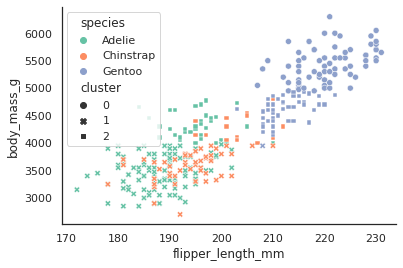

In [35]:
### Plot the cluster and the labels
sns.scatterplot(data=data_penguin, x="flipper_length_mm", y="body_mass_g", hue ="species", style="cluster")
sns.despine()

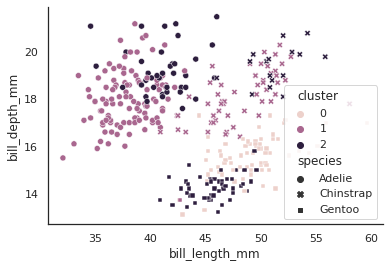

In [36]:
sns.scatterplot(data=data_penguin, x="bill_length_mm",y="bill_depth_mm", hue="cluster", style="species")
sns.despine()

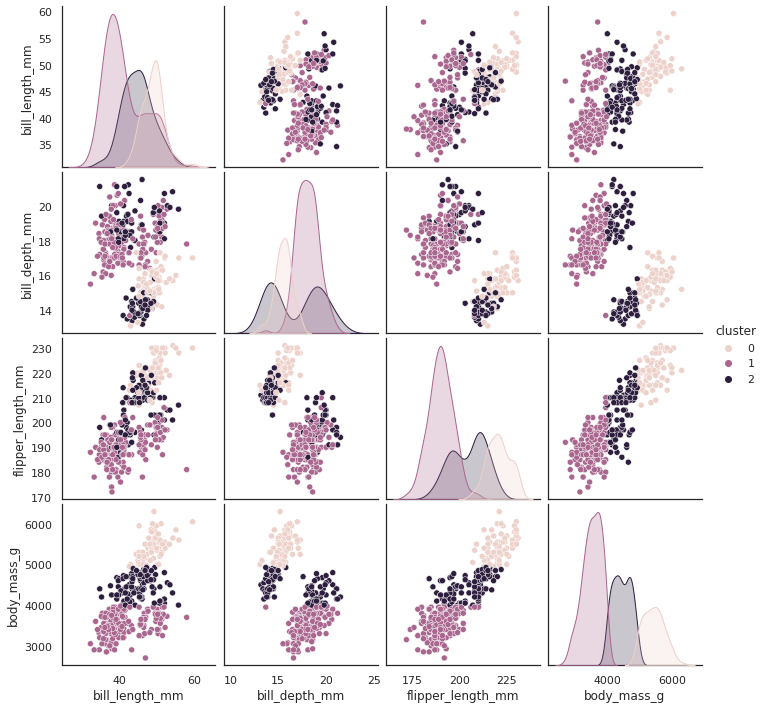

In [38]:
sns.pairplot(data=data_penguin,hue="cluster")

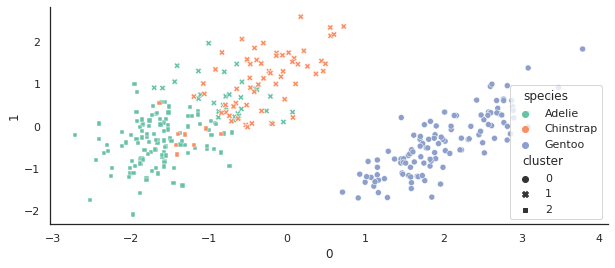

In [34]:
### Instead of using measurements values, cluster penguins based on the result of the dimensionality reduction


It is not always easy to define the number of cluster to use!

The most common approach for deciding the value of $K$ is the so-called elbow method. It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

<code>inertia_</code>: sum of squared distances of samples to their closest cluster center

In [36]:
### Get the inertia of our initial kmean
kmeans_P.inertia_

223.61240439194583

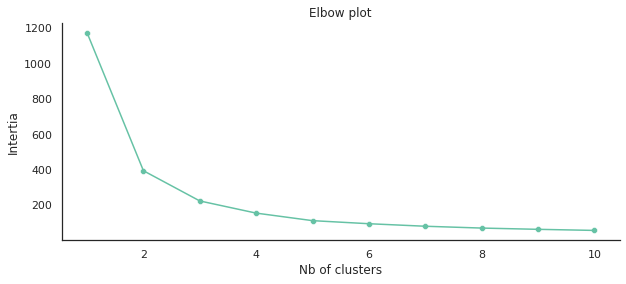

In [39]:
### Run kmeans for various k values
### initiate empty list
inertia_list = []

X = reduce_penguin.iloc[:, 0:2]

### Create for loop for K from 1 to 10
for k in range(1, 11) :
    kmean = sklearn.cluster.KMeans(n_clusters=k)
    kmeans_X = kmean.fit(X)
    
    ## Add the inertia to the list
    inertia_list += [kmeans_X.inertia_]
    
### Plot K vs. intertia
plt.figure(figsize=(10, 4))
sns.lineplot(x=np.arange(1, 11), y=inertia_list)
sns.scatterplot(x=np.arange(1, 11), y=inertia_list)

plt.title("Elbow plot")
plt.xlabel("Nb of clusters")
plt.ylabel("Intertia")

sns.despine()

## Data Analysis III: Putting it all together!

You are given a dataset of gene experissions for $N$ samples. Each sample represent a breast cancer patient. 
The dataset comprises two TSV files:
* `patient_expression.tsv`: contains the expressions of $M$ genes for each of the `N` patients;
* `patient_subtype.tsx`: contains the clinical classification of each patient;

The order is the same for all files.

You wonder if you can cluster patient, from their expression profil, by clinical classification.
** The expression values are already log-transformed

### Create a dataframe of the data

In [31]:
data_e = pd.read_csv("breast_cancer_expression.tsv", sep="\t", header=0)
data_s = pd.read_csv("breast_cancer_subtype.tsv", sep="\t", header= None)

In [54]:
data_e

ENSG00000011426.9  ENSG00000054598.6  ENSG00000062038.12  \
0             1.326515           3.475678            2.374959   
1             1.885133           2.752910            3.770004   
2             3.246316           4.423018            3.700385   
3             2.161512           2.314358            3.562899   
4             2.795468           1.876752            0.658127   
..                 ...                ...                 ...   
640           0.820838           2.418684            3.460263   
641           1.666605           1.818016            2.965531   
642           0.810583           2.097097            3.595351   
643           1.153391           0.935530            2.415240   
644           1.980530           1.754886            2.231407   

     ENSG00000077152.8  ENSG00000082175.13  ENSG00000089685.13  \
0             3.409941            0.014148            3.235387   
1             3.822052            0.051402            3.001023   
2             4.369893            0.155187            3.752491   
3             3.786747            0.039245            4.227823   
4             2.581386            0.014486            2.688765   
..                 ...                 ...                 ...   
640           1.714065            2.574779            1.158088   
641           3.398361            1.131149            2.243665   
642           1.667315            0.563232            1.041924   
643           2.179527            0.183943            1.688365   
644           3.266043            1.223170            2.812263   

     ENSG00000091831.20  ENSG00000092621.10  ENSG00000094804.8  \
0              0.094595            4.488874           2.023978   
1              0.241303            3.680198           1.820556   
2              0.102125            3.779098           2.218593   
3              0.493791            4.124650           2.202475   
4              0.432283            2.655957           1.872897   
..                  ...                 ...                ...   
640            2.099645            2.689138           0.705885   
641            2.103245            3.090764           1.380203   
642            1.894974            1.950360           1.017512   
643            0.297845            2.814779           0.754930   
644            2.358093            2.448979           1.666034   

     ENSG00000099953.8  ...  ENSG00000171791.11  ENSG00000171848.12  \
0             3.996567  ...            0.415417            3.163366   
1             1.344271  ...            2.035764            2.339897   
2             1.927426  ...            1.123048            3.647681   
3             2.317170  ...            0.930984            3.071066   
4             0.924654  ...            1.975961            2.893713   
..                 ...  ...                 ...                 ...   
640           3.340791  ...            2.522965            1.112896   
641           4.770786  ...            1.989089            2.517961   
642           3.408128  ...            1.953431            1.019320   
643           4.585375  ...            0.820314            2.377948   
644           3.623672  ...            2.487813            2.063080   

     ENSG00000173890.15  ENSG00000174371.15  ENSG00000175063.15  \
0              1.751804            1.727270            4.541346   
1              0.949565            1.967062            4.167635   
2              1.063245            2.876544            4.498677   
3              0.577870            2.554480            4.879861   
4              0.272402            2.119050            3.571224   
..                  ...                 ...                 ...   
640            2.147804            0.498596            1.633678   
641            1.820856            1.147327            3.336830   
642            1.837105            0.575619            1.638372   
643            2.120787            0.626063            2.161975   
644            2.663586            1.524862     

In [32]:
data_s

0
0     Basal
1     Basal
2     Basal
3     Basal
4     Basal
..      ...
640  Normal
641  Normal
642  Normal
643  Normal
644  Normal

[645 rows x 1 columns]

In [39]:
### rename
data=data_s.loc[:,0:1]
data_s.rename({0:"subtypes"}, axis=1, inplace=True)

data_s

subtypes
0      Basal
1      Basal
2      Basal
3      Basal
4      Basal
..       ...
640   Normal
641   Normal
642   Normal
643   Normal
644   Normal

[645 rows x 1 columns]

### Explore the data [35 points]

<hr>

#### Part 1 [15 points]
Answer the following questions:
1. How many patients are you considering?
2. How many genes are you considering?
3. Is there a pair of genes that seems to be linearly correlated? If yes, which genes and what is the correlation coefficient?

In [45]:
#How many patients are you considering?

len(data_s)

645

In [94]:
#How many genes are you considering?
#47 genes(column number minus 1 for subtypes)

In [44]:
##merge the two tables

data_e.loc[:,"subtypes"]= data_s.loc[:,"subtypes"]
data_e

ENSG00000011426.9  ENSG00000054598.6  ENSG00000062038.12  \
0             1.326515           3.475678            2.374959   
1             1.885133           2.752910            3.770004   
2             3.246316           4.423018            3.700385   
3             2.161512           2.314358            3.562899   
4             2.795468           1.876752            0.658127   
..                 ...                ...                 ...   
640           0.820838           2.418684            3.460263   
641           1.666605           1.818016            2.965531   
642           0.810583           2.097097            3.595351   
643           1.153391           0.935530            2.415240   
644           1.980530           1.754886            2.231407   

     ENSG00000077152.8  ENSG00000082175.13  ENSG00000089685.13  \
0             3.409941            0.014148            3.235387   
1             3.822052            0.051402            3.001023   
2             4.369893            0.155187            3.752491   
3             3.786747            0.039245            4.227823   
4             2.581386            0.014486            2.688765   
..                 ...                 ...                 ...   
640           1.714065            2.574779            1.158088   
641           3.398361            1.131149            2.243665   
642           1.667315            0.563232            1.041924   
643           2.179527            0.183943            1.688365   
644           3.266043            1.223170            2.812263   

     ENSG00000091831.20  ENSG00000092621.10  ENSG00000094804.8  \
0              0.094595            4.488874           2.023978   
1              0.241303            3.680198           1.820556   
2              0.102125            3.779098           2.218593   
3              0.493791            4.124650           2.202475   
4              0.432283            2.655957           1.872897   
..                  ...                 ...                ...   
640            2.099645            2.689138           0.705885   
641            2.103245            3.090764           1.380203   
642            1.894974            1.950360           1.017512   
643            0.297845            2.814779           0.754930   
644            2.358093            2.448979           1.666034   

     ENSG00000099953.8  ...  ENSG00000171848.12  ENSG00000173890.15  \
0             3.996567  ...            3.163366            1.751804   
1             1.344271  ...            2.339897            0.949565   
2             1.927426  ...            3.647681            1.063245   
3             2.317170  ...            3.071066            0.577870   
4             0.924654  ...            2.893713            0.272402   
..                 ...  ...                 ...                 ...   
640           3.340791  ...            1.112896            2.147804   
641           4.770786  ...            2.517961            1.820856   
642           3.408128  ...            1.019320            1.837105   
643           4.585375  ...            2.377948            2.120787   
644           3.623672  ...            2.063080            2.663586   

     ENSG00000174371.15  ENSG00000175063.15  ENSG00000176890.14  \
0              1.727270            4.541346            3.437507   
1              1.967062            4.167635            3.288760   
2              2.876544            4.498677            2.722251   
3              2.554480            4.879861            3.597988   
4              2.119050            3.571224            2.554718   
..                  ...                 ...                 ...   
640            0.498596            1.633678            1.791459   
641            1.147327            3.336830            2.926771   
642            0.575619            1.638372            1.749170   
643            0.626063            2.161975            1.224772   
644            1.524862            3.562984     

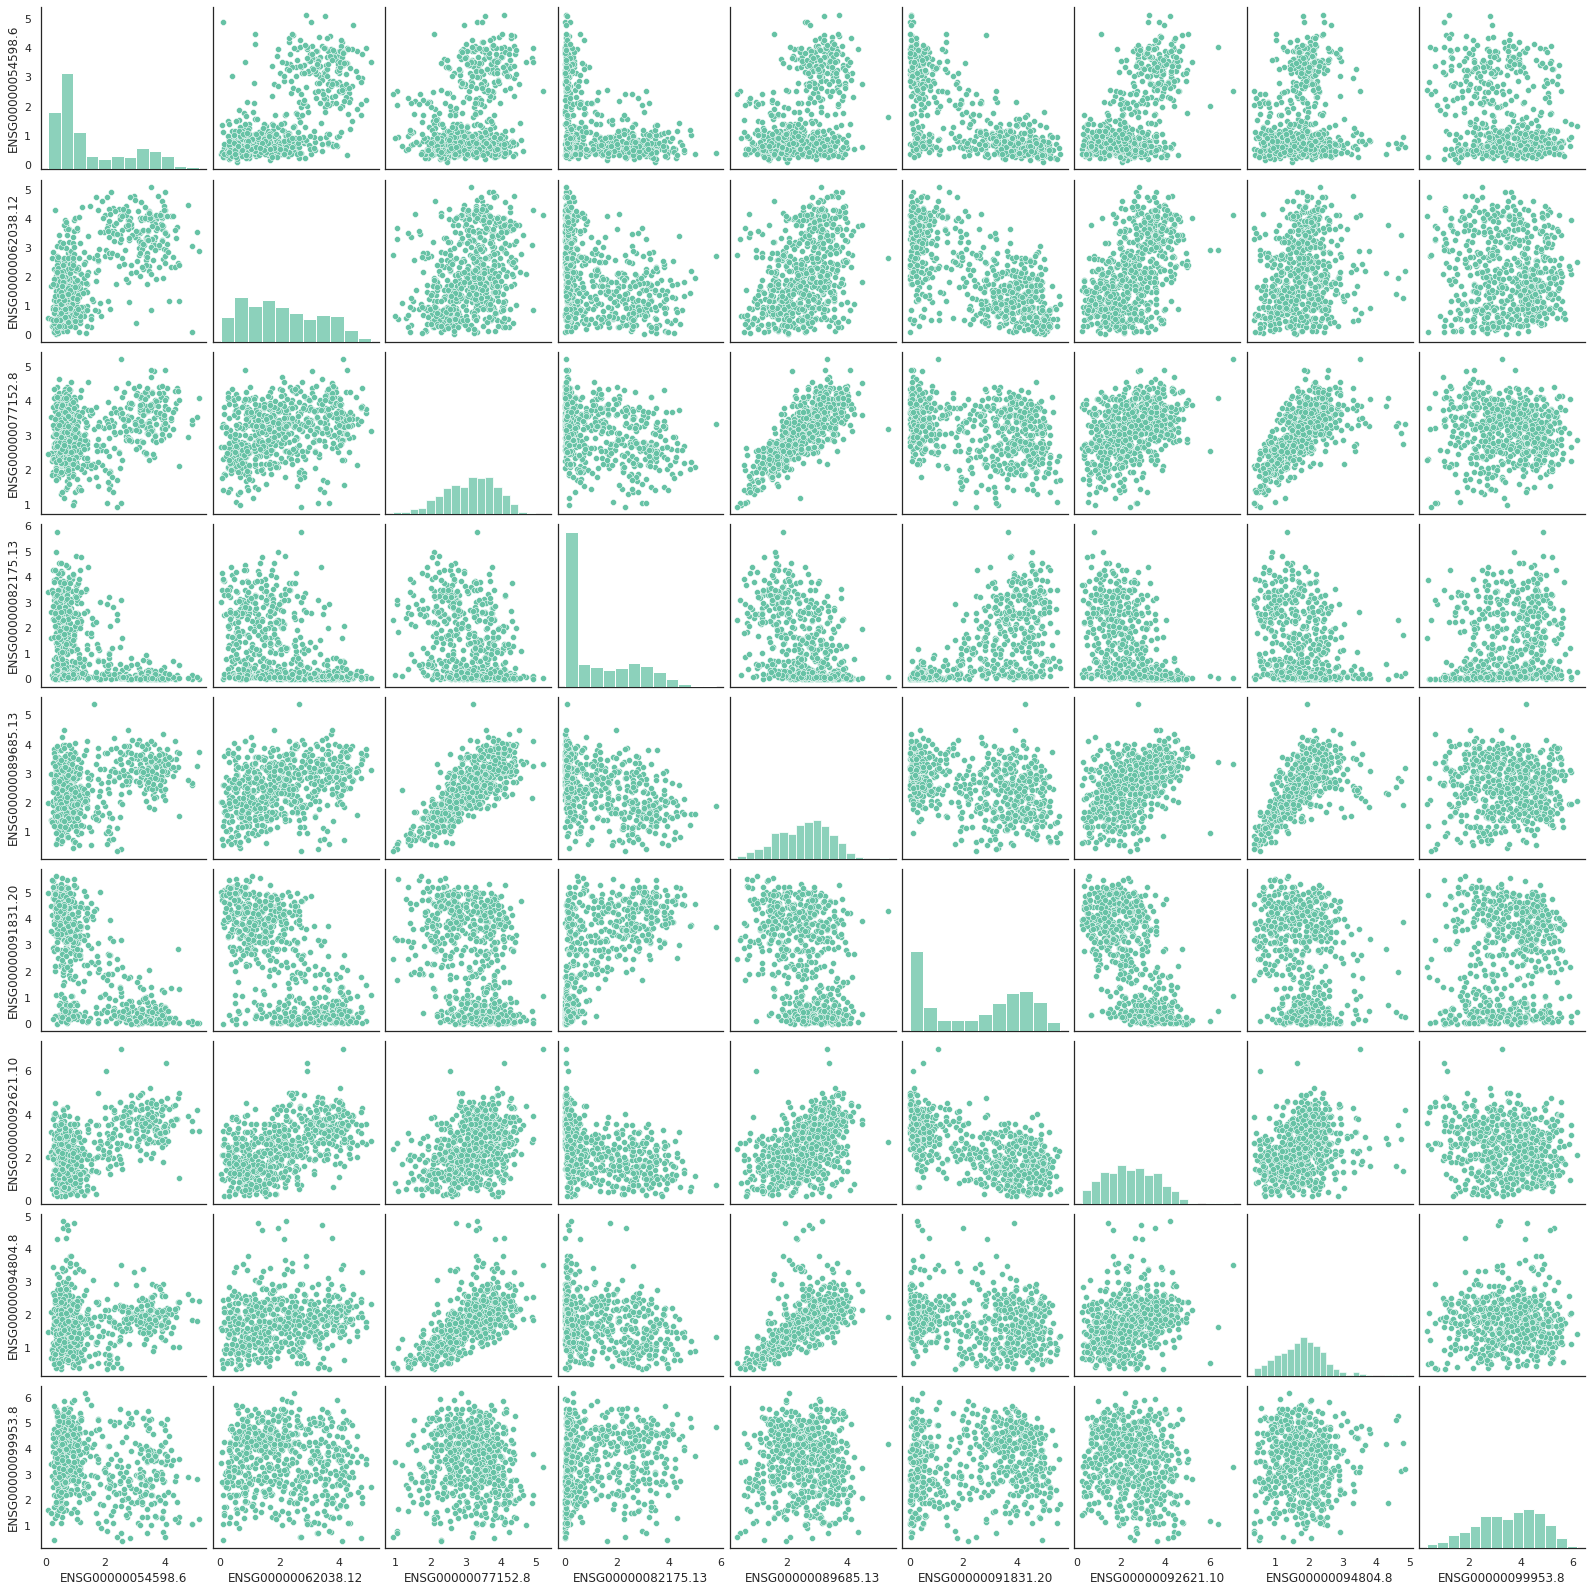

In [60]:
#Is there a pair of genes that seems to be linearly correlated?

p1 = sns.pairplot(data=data_e.iloc[:,1:10],diag_kind="hist")
sns.despine()
#several genes in the first 10 genes out of 47 already showed linear correlation

In [18]:
import scipy
data_er = sp.stats.linregress( x= data_e.loc[:,"ENSG00000077152.8"], y = data_e.loc[:,"ENSG00000089685.13"])
data_er.rvalue
#the linear regression of gene ENSG00000077152.8 and ENSG00000089685.13 acheieved a R value of 0.766

0.7667386364941874

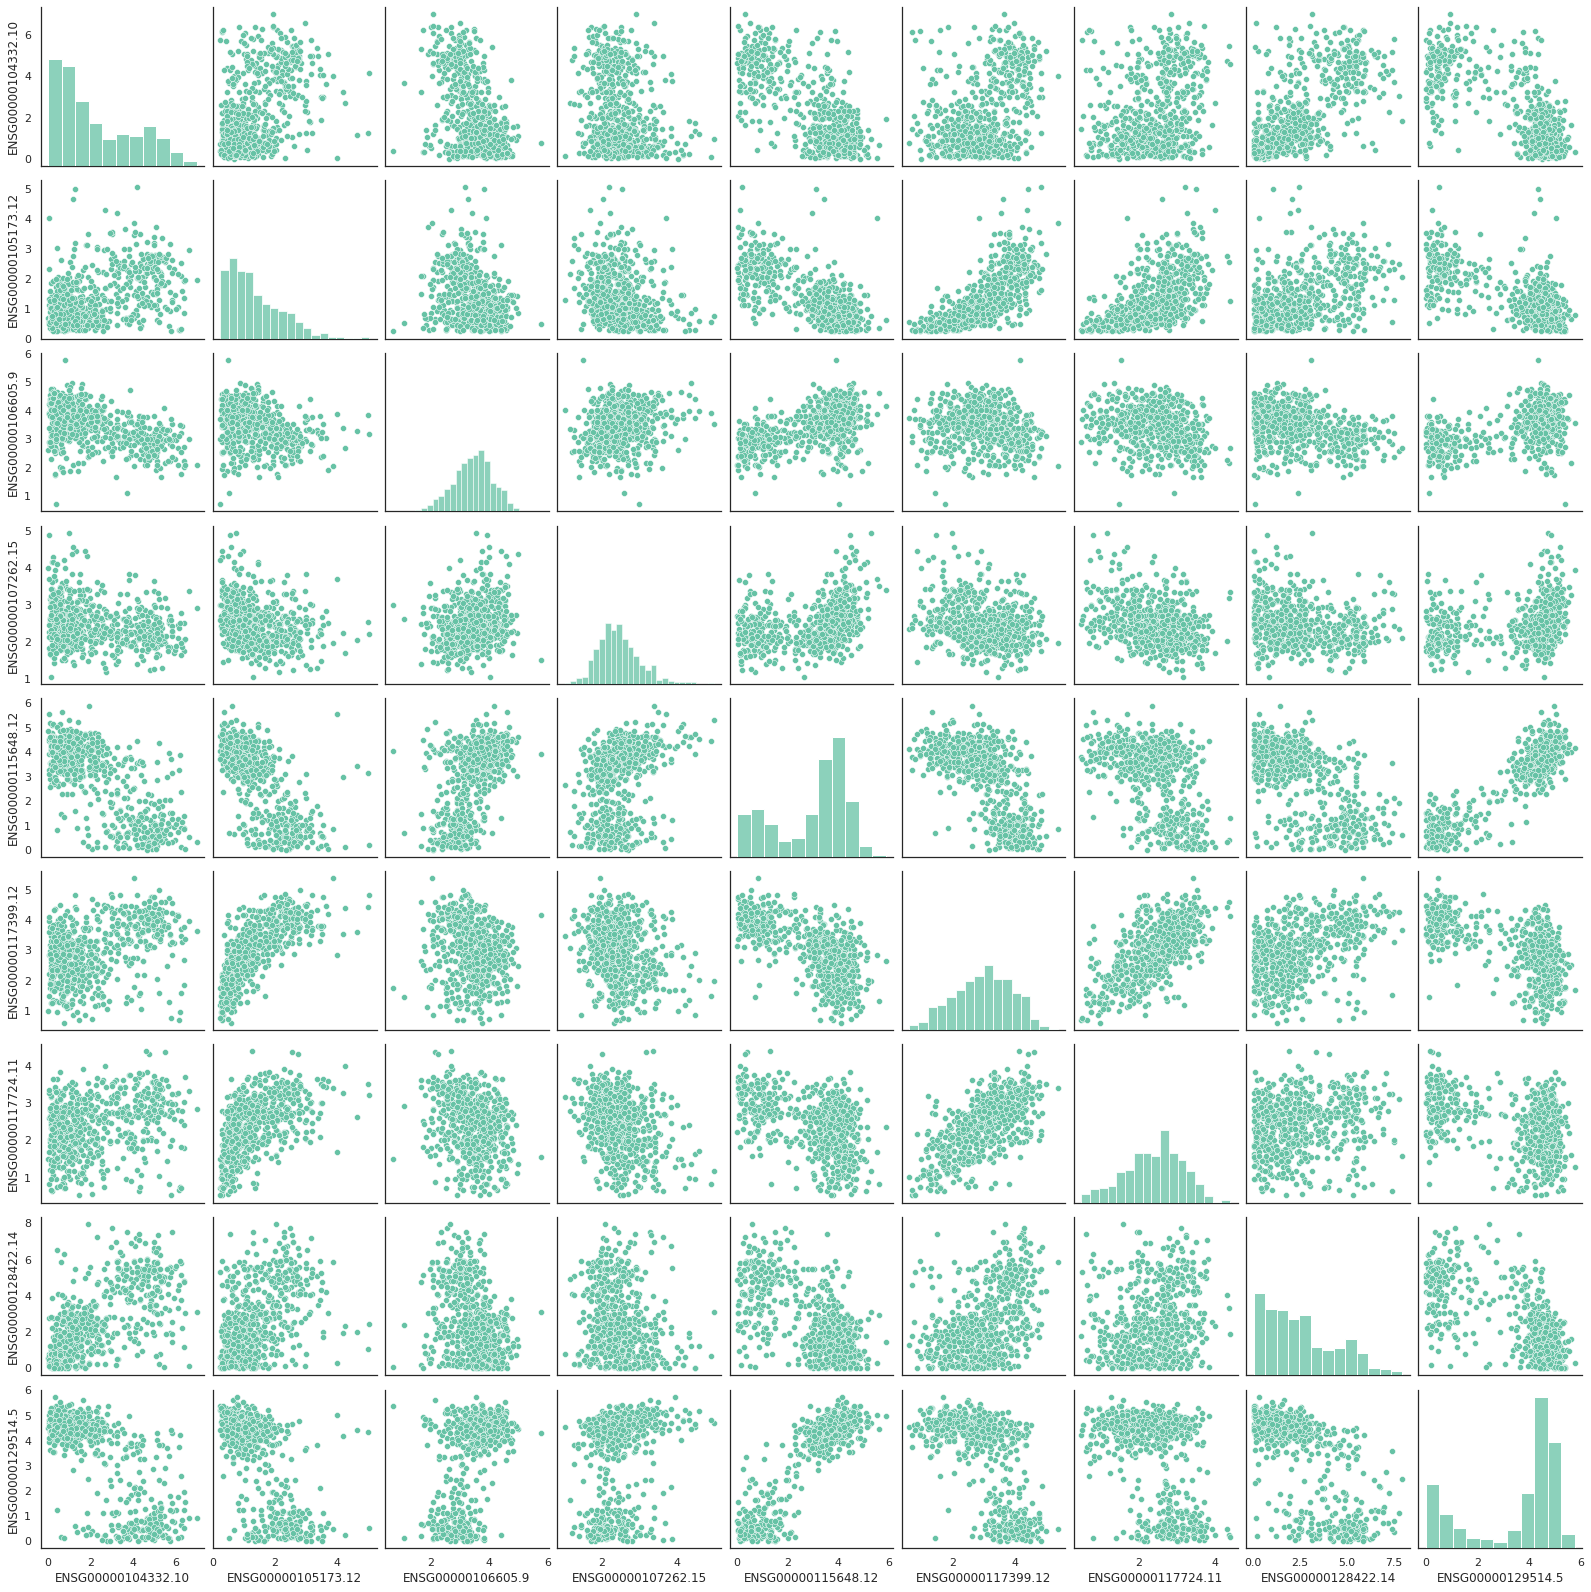

In [61]:
p2 = sns.pairplot(data=data_e.iloc[:,11:20],diag_kind="hist")
sns.despine()
#several genes in the first 11 to 20th genes out of 47 showed linear correlation

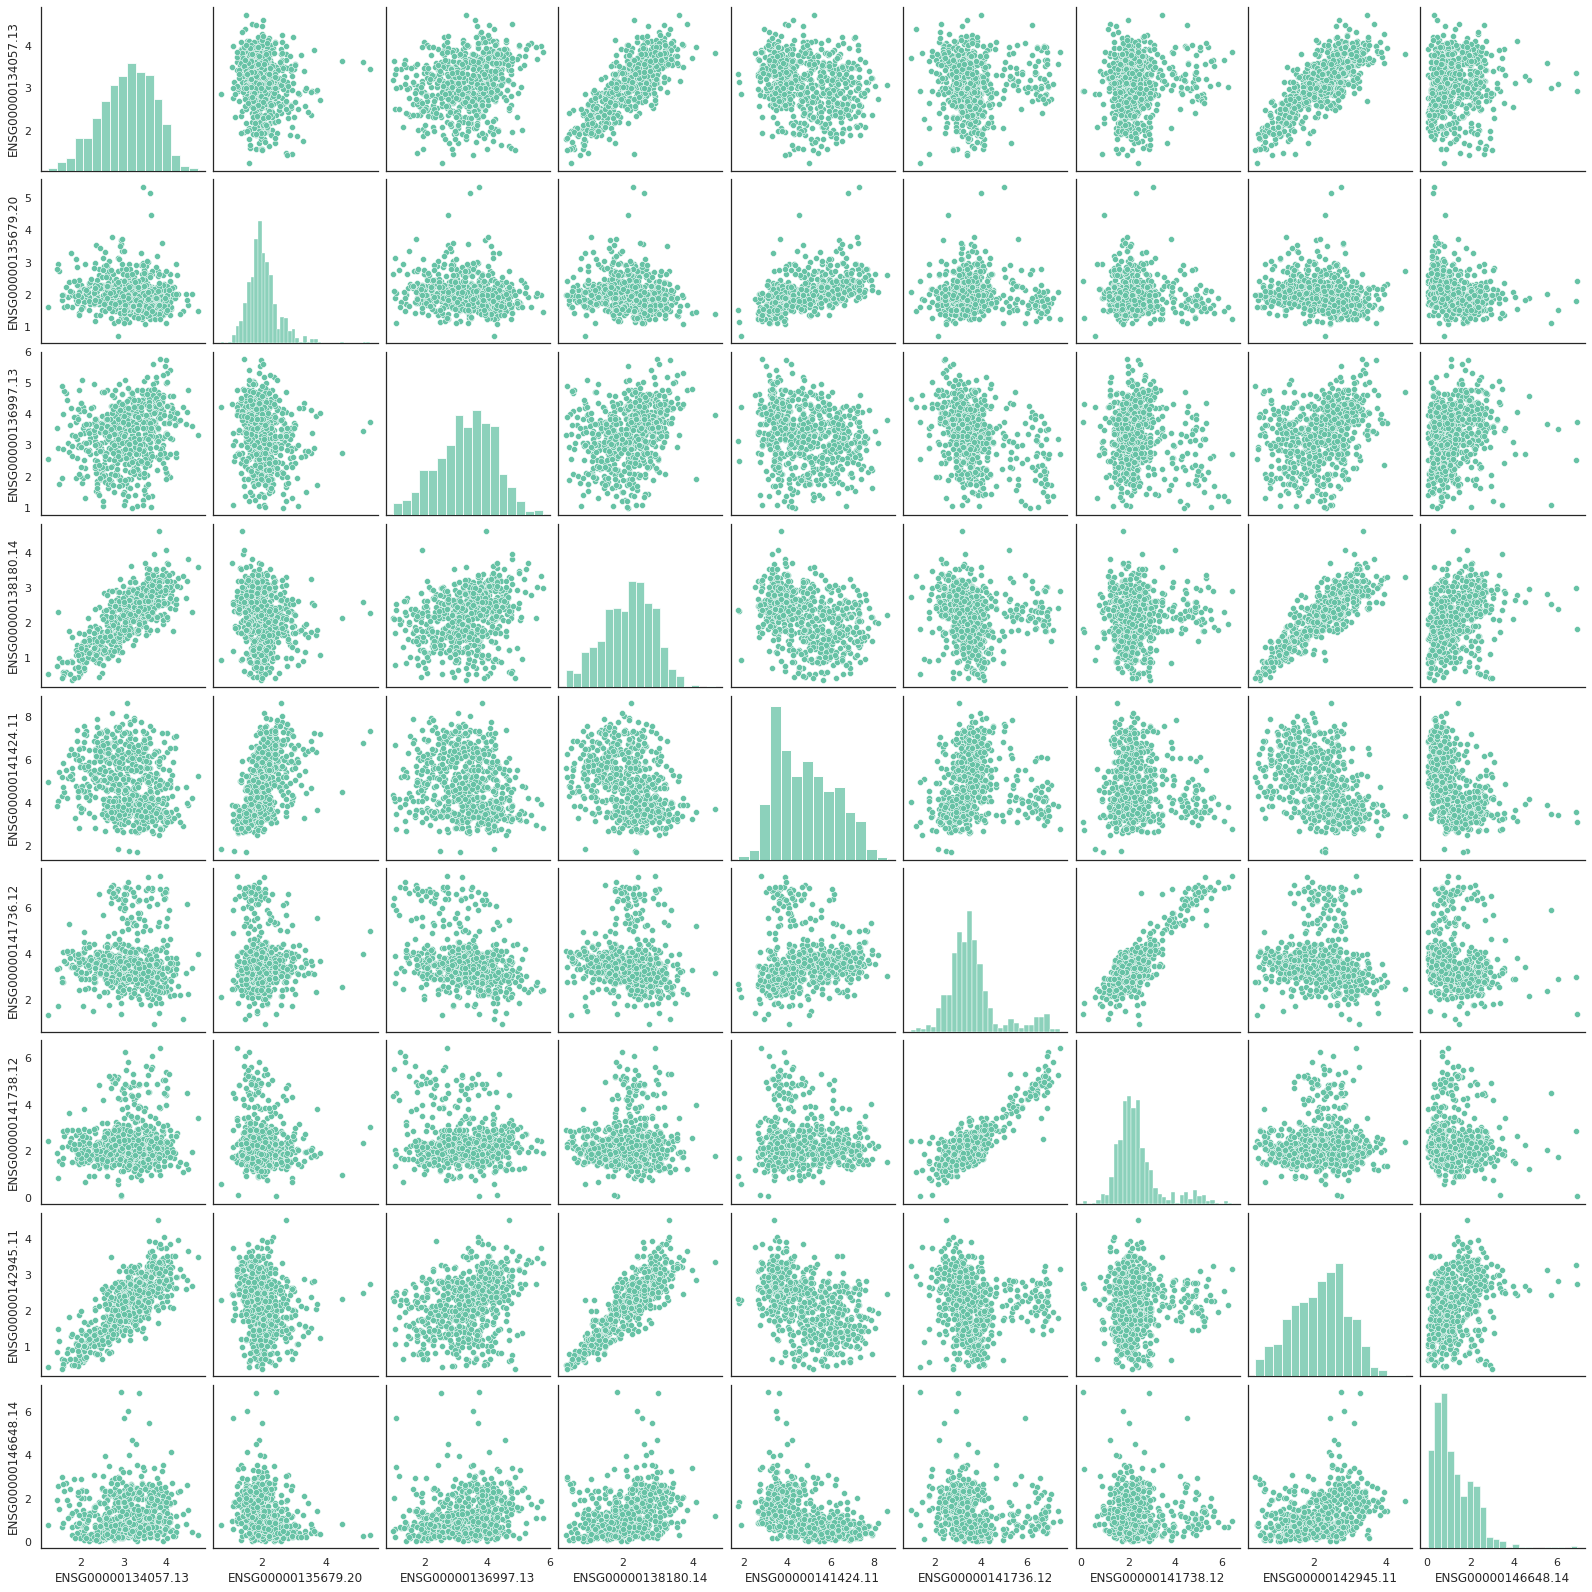

In [62]:
p3 = sns.pairplot(data=data_e.iloc[:,21:30],diag_kind="hist")
sns.despine()
#several genes in the 21 to 30th genes out of 47 showed linear correlation

In [83]:
import scipy
data_er = sp.stats.linregress( x= data_e.loc[:,"ENSG00000141738.12"], y = data_e.loc[:,"ENSG00000141736.12"])
data_er.rvalue
#the linear regression of gene ENSG00000077152.8 and ENSG00000089685.13 acheieved a R value of 0.867

0.867027668536396

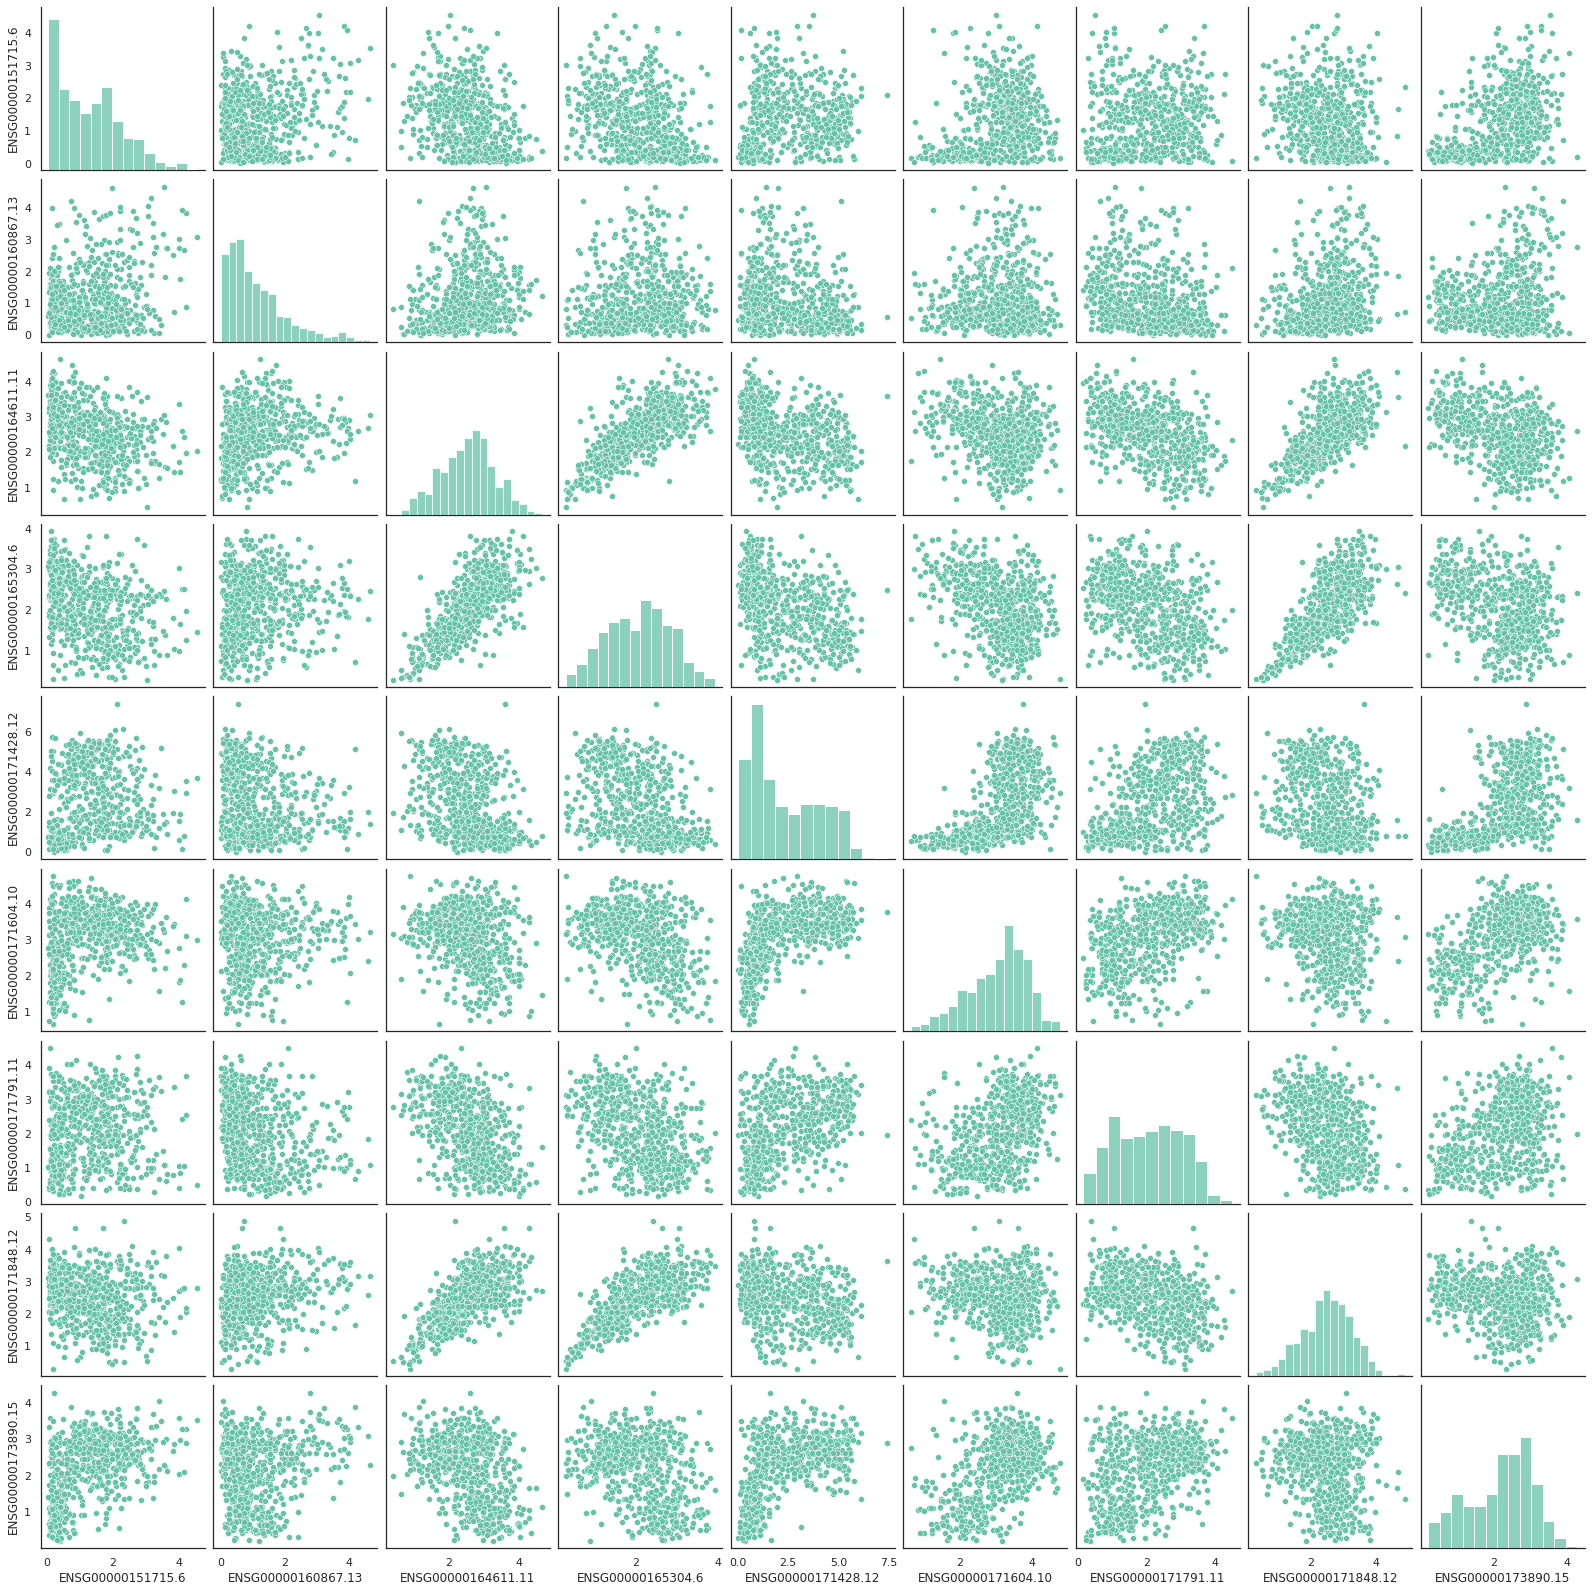

In [64]:
p4 = sns.pairplot(data=data_e.iloc[:,31:40],diag_kind="hist")
sns.despine()
#several genes in the 31 to 40th genes out of 47 showed linear correlation

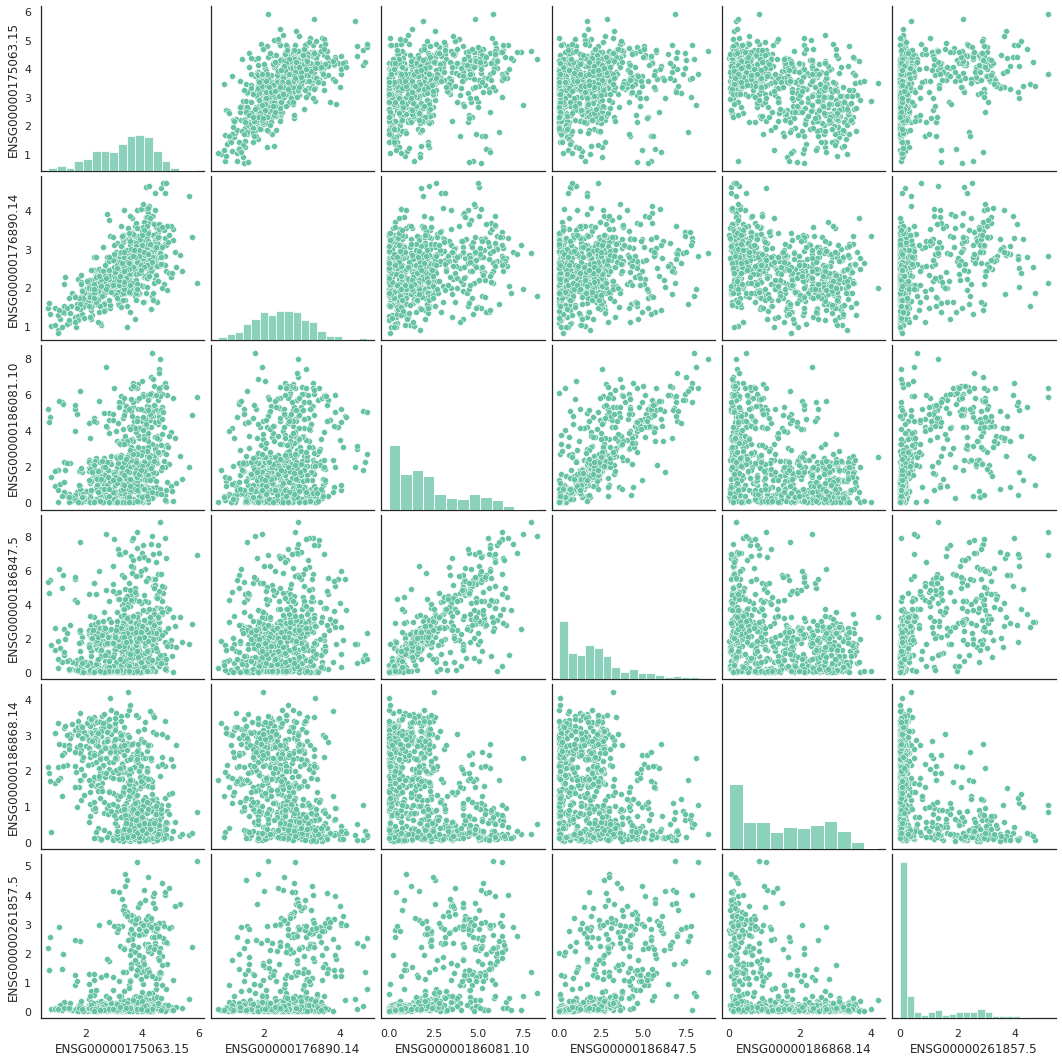

In [65]:
p5 = sns.pairplot(data=data_e.iloc[:,41:47],diag_kind="hist")
sns.despine()
#several genes in the 41 to 47th genes out of 47 showed linear correlation

ENSG00000115648.12  vs.  ENSG00000129514.5  ------> 0.91
ENSG00000117399.12  vs.  ENSG00000142945.11  ------> 0.92


<hr>

#### Part 2 [20 points]
Visually inspect your dataset by generating at least two (2) graphs. For each visualisation you should:
* State what you are exploring;
* Plot comprehensive graphs (title, axis-labels, legend if necesssary);
* Give a consise interpretation of the results.

In [ ]:
## State what you are exploring
## question 1: are pair of genes linearly correlated also has correaltion with subtypes?
## question 2: if question 1 is ture, are pair of genes 
## WITHOUTlinearly correlated with subtypes?

Text(0, 0.5, 'ENSG00000089685.13(expression ratio)')

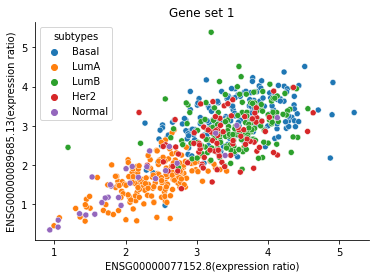

In [101]:
#Plot comprehensive graphs

### Plot the gene ENSG00000077152.8 versus gene ENSG00000089685.13, the two show linear regression in part 1
###colored in subtype
p= sns.scatterplot(data=data_e, x="ENSG00000077152.8", y="ENSG00000089685.13", hue="subtypes")
sns.despine()

### Add a descriptive title
p.set_title("Gene set 1")
p.set_xlabel("ENSG00000077152.8(expression ratio)")
p.set_ylabel("ENSG00000089685.13(expression ratio)")


Text(0, 0.5, 'ENSG00000054598.6(expression ratio)')

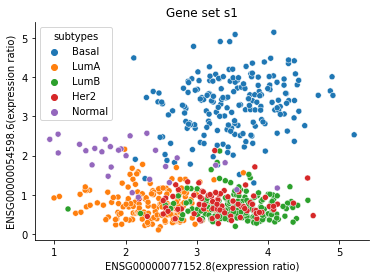

In [134]:
### Plot the gene1 ENSG00000077152.8 versus gene2 ENSG00000054598.6, 
### the two show no linear regression in part 1(gene1 consistent in gene set 1)
###colored in subtype
p= sns.scatterplot(data=data_e, x="ENSG00000077152.8", y="ENSG00000054598.6", hue="subtypes")
sns.despine()

### Add a descriptive title
p.set_title("Gene set s1")
p.set_xlabel("ENSG00000077152.8(expression ratio)")
p.set_ylabel("ENSG00000054598.6(expression ratio)")

In [ ]:
### for question 1: 
### gene pairs linearly correlated do show correaltion with some subtypes

### the first set of gene both show lower expression in normal and Lum A subtypes,
### and higher expression in Basal, LumB and Her2 subtypes
 
### the gene set s1: it seems no significant relationship in all subtypes
### when considering the two gene as a whole



### for question 2: 
###different pair of genes WETHER linearly correlated OR NOT, 
###DO likely to  correlate with subtypes

### it is likely that pair of genes 
### WITH linearly correlated with subtypes rather than
###pair of genes WITHOUT linearly correlation
### more comparison should be done to consolid this statement
###This is benefitial for uncovering the 
###genetic background differences encoding different subtypes


<hr style="border:1px solid black"> </hr>

### Analyse the data [60 points]

You are wondering if it would be possible to group patients in various subsets. 

<hr>

#### Part 1 [20 points]

Using the methods presented in previous class, are you able to group patients in various subsets?

Make sure that each step of your analysis is clearly identifiable. When you make decision regarding algorithm parameters, make sure to justify them with a short sentence and a plot (if applicable).

For each results generated, give a concise interpretation.

In [ ]:
### I am able to group patients in various subsets

In [ ]:
## use algorithm PCA: reduce the dimensionality of large data sets
## comparing with the non-grouped 2 gene comparison, 
## comparing PCs  gives overall and more classified results
## and it is able to analysis the whole gene set at a time

In [85]:
### Define the data we need for the PCA
X = data_e.iloc[:,0:46]

### Initiate the PCA and apply it to our data
pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(X)

# Instantiate a new scaler
scaler = sklearn.preprocessing.StandardScaler()

# Learn the pattern from the input data
scaler.fit(X)

#Apply the pattern
X_scaled = scaler.transform(X) 

In [86]:
### Initiate the PCA and apply it to the scaled data
pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(X_scaled)
X_scaled

array([[-1.07311744,  1.54773206,  0.21850342, ...,  1.83762333,
         2.81916871, -0.81030189],
       [-0.35738155,  0.97110549,  1.33880784, ...,  1.6750331 ,
         0.37853481, -1.25452672],
       [ 1.38665185,  2.3035234 ,  1.2829    , ...,  0.49227534,
        -0.12338004, -1.01049597],
       ...,
       [-1.73416158,  0.44789575,  1.19855123, ...,  1.6977256 ,
         1.82785701,  0.56288815],
       [-1.29493475, -0.47880604,  0.25085169, ...,  0.71786328,
         0.61015446, -0.10322341],
       [-0.23515225,  0.17487868,  0.10322316, ...,  1.00025192,
         1.43032829,  0.47611013]])

In [87]:
## Get estimated number of components
pca.n_components_
#we will use for PCA classification will be 4

4

In [88]:
## Get the explained_variance
pca.explained_variance_

print(pca)

### Apply the dimensionality reduction to our data
X_reduce = pca.fit_transform(X_scaled)
print(X_reduce)

PCA(n_components=4)
[[-5.21675048  2.33210831  1.00075149 -3.24386581]
 [-5.15133266  2.57265608 -0.90486669 -0.85727819]
 [-8.27007791  0.45021401 -2.0632737   0.80505885]
 ...
 [ 4.0366685   6.36808129  1.9498151  -1.06830667]
 [ 2.73210162  3.97805761  4.42651849 -0.19644565]
 [-0.05342576  1.47829004 -0.34665965 -0.87304011]]


In [89]:
### Make a dataframe and add labelling columns
reduce_e = pd.DataFrame(X_reduce)

reduce_e.head()

0         1         2         3
0 -5.216750  2.332108  1.000751 -3.243866
1 -5.151333  2.572656 -0.904867 -0.857278
2 -8.270078  0.450214 -2.063274  0.805059
3 -7.293307  0.330640 -0.760401 -2.382726
4 -3.917942  2.476345 -2.484746  6.255924

In [95]:
##merge the two tables
reduce_e.loc[:,"subtypes"]= data_s["subtypes"]

### rename
data=reduce_e
data.rename({0:"PCA1"}, axis=1, inplace=True)
data.rename({1:"PCA2"}, axis=1, inplace=True)
data.rename({2:"PCA3"}, axis=1, inplace=True)
data.rename({3:"PCA4"}, axis=1, inplace=True)

reduce_e

PCA1      PCA2      PCA3      PCA4 subtypes
0   -5.216750  2.332108  1.000751 -3.243866    Basal
1   -5.151333  2.572656 -0.904867 -0.857278    Basal
2   -8.270078  0.450214 -2.063274  0.805059    Basal
3   -7.293307  0.330640 -0.760401 -2.382726    Basal
4   -3.917942  2.476345 -2.484746  6.255924    Basal
..        ...       ...       ...       ...      ...
640  4.371436  5.886494  1.457477 -1.356852   Normal
641 -0.517146  1.833369  1.410438 -2.267259   Normal
642  4.036669  6.368081  1.949815 -1.068307   Normal
643  2.732102  3.978058  4.426518 -0.196446   Normal
644 -0.053426  1.478290 -0.346660 -0.873040   Normal

[645 rows x 5 columns]

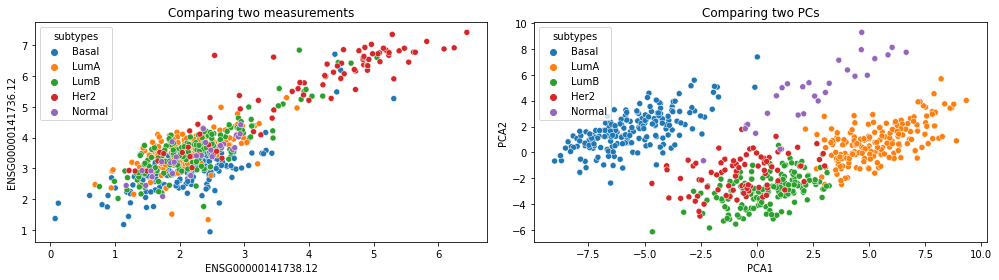

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.scatterplot(data=data_e, x="ENSG00000141738.12", y="ENSG00000141736.12", hue="subtypes", ax=ax[0])
ax[0].set_title("Comparing two measurements")

sns.scatterplot(data=reduce_e, x="PCA1", y="PCA2", hue="subtypes", ax=ax[1])
ax[1].set_title("Comparing two PCs")

plt.tight_layout()
plt.show()

## we got clear classification bewteen PCs!!!

In [ ]:
### after this, I did the KMeans algorithm to cluster data 
###by trying to separate samples in n groups of equal variance, 
### to minimize within-cluster sum-of-squares

In [ ]:
random.seed(0)

In [117]:
### Define the data
P1 = data_e.iloc[:,0:3]
P1.head

<bound method NDFrame.head of      ENSG00000011426.9  ENSG00000054598.6  ENSG00000062038.12
0             1.326515           3.475678            2.374959
1             1.885133           2.752910            3.770004
2             3.246316           4.423018            3.700385
3             2.161512           2.314358            3.562899
4             2.795468           1.876752            0.658127
..                 ...                ...                 ...
640           0.820838           2.418684            3.460263
641           1.666605           1.818016            2.965531
642           0.810583           2.097097            3.595351
643           1.153391           0.935530            2.415240
644           1.980530           1.754886            2.231407

[645 rows x 3 columns]>

In [119]:
### Initiate the k-means alogirthm
### How many cluster should we use?
### 5 clusters, as we want to group by different subtypes
K = 5
kmean = sklearn.cluster.KMeans(n_clusters=K)
kmean

KMeans(n_clusters=5)

In [121]:
### Apply kmeans to our data
kmeans_P1 = kmean.fit(P1)

In [123]:
### Get centroids coordinate
kmeans_P1.cluster_centers_

array([[1.28267762, 0.72428527, 0.83611447],
       [2.69292159, 3.61084956, 2.69308256],
       [2.03569964, 0.98092983, 2.68940552],
       [2.82127056, 3.04413656, 4.02561489],
       [2.42085528, 0.73288736, 1.29443538]])

In [125]:
### Get datapoints labels
kmeans_P.labels_

array([1, 3, 1, 3, 4, 1, 1, 3, 1, 1, 1, 1, 3, 2, 1, 3, 3, 3, 1, 1, 1, 3,
       1, 3, 3, 4, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1,
       3, 1, 1, 3, 1, 1, 3, 2, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3,
       3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 2, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1,
       1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 2, 1, 3, 3, 1, 1, 3, 3, 3, 1,
       1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3,
       3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 4, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 4, 0, 0, 0, 2, 0,
       0, 0, 2, 4, 0, 2, 0, 2, 2, 4, 2, 4, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0,

In [126]:
### Add the cluster column
reduce_e.loc[:,"cluster"]=kmeans_P1.labels_

Text(0.5, 1.0, 'reduced PC1 VS PC2')

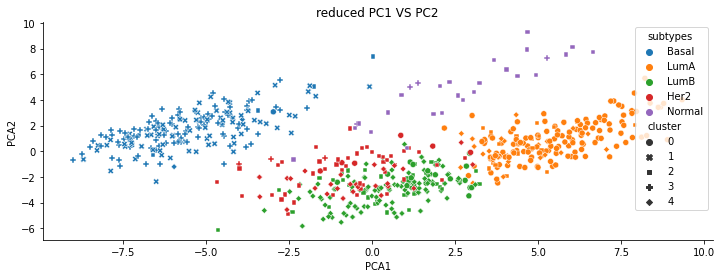

In [129]:
### Instead of using measurements values, cluster  based on the result of the dimensionality reduction

fig = plt.figure(figsize=(12,4))

t = sns.scatterplot(data=reduce_e, x="PCA1", y="PCA2", hue ="subtypes", style="cluster")
sns.despine()

t.set_title("reduced PC1 VS PC2")

In [130]:
### Get the inertia of our initial kmean
kmeans_P1.inertia_

518.7342096552029

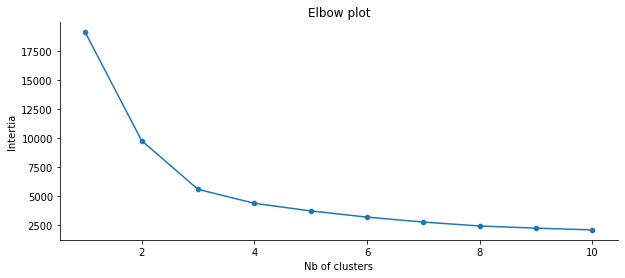

In [131]:
### Run kmeans for various k values
### initiate empty list
inertia_list = []

X = reduce_e.iloc[:, 0:3]

### Create for loop for K from 1 to 10
for k in range(1, 11) :
    kmean = sklearn.cluster.KMeans(n_clusters=k)
    kmeans_X = kmean.fit(X)
    
    ## Add the inertia to the list
    inertia_list += [kmeans_X.inertia_]
    
### Plot K vs. intertia
plt.figure(figsize=(10, 4))
sns.lineplot(x=np.arange(1, 11), y=inertia_list)
sns.scatterplot(x=np.arange(1, 11), y=inertia_list)

plt.title("Elbow plot")
plt.xlabel("Nb of clusters")
plt.ylabel("Intertia")

sns.despine()

In [ ]:
# did elbow plot for checking if k = 5 is appropriate:
# clustering score as a function of the number of clusters

Are you able to link each found cluster to a cancer subtype?

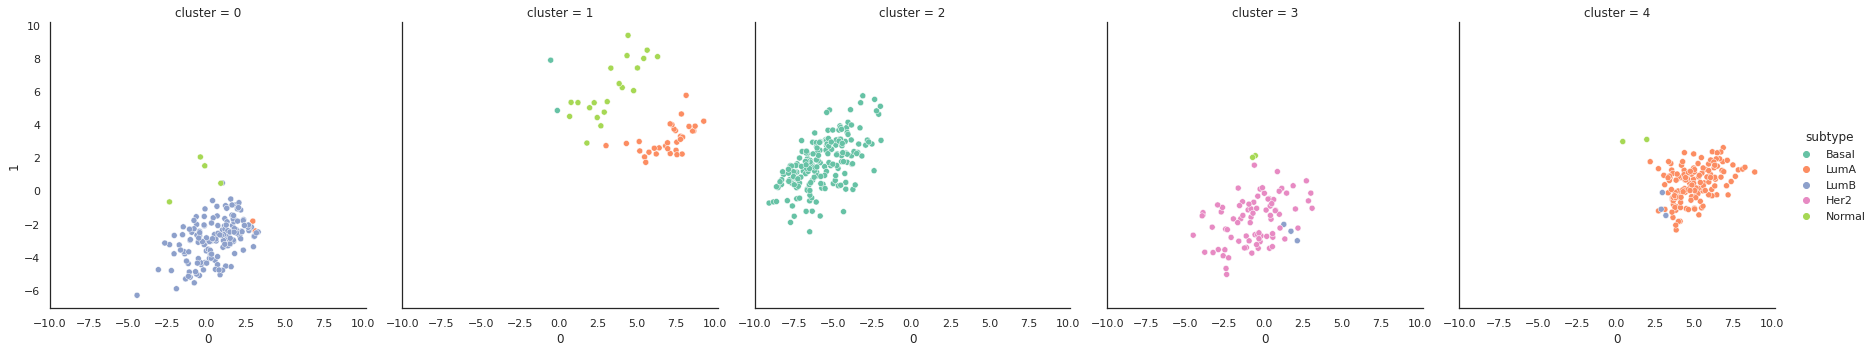

In [74]:
### yes! as each subtype stained in different colors
### and different clusters are in different styles (refer to graph shown before)
### by looking at the graph, it is apparent that 
### style and hue are highly linked

<hr>

#### Part 2

Go back the pair(s) of genes with high linear correlation. Do their expressions differ from one to subtype to another? If so, how?

Text(0, 0.5, 'ENSG00000141736.12(expression ratio)')

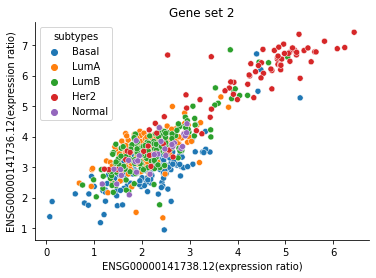

In [132]:
### Plot the gene ENSG00000141738.12 versus gene ENSG00000141736.12, the two show linear regression in part 1
###colored in subtype
p=sns.scatterplot(data=data_e, x="ENSG00000141738.12", y="ENSG00000141736.12", hue="subtypes")
sns.despine()

### Add a descriptive title
p.set_title("Gene set 2")
p.set_xlabel("ENSG00000141738.12(expression ratio)")
p.set_ylabel("ENSG00000141736.12(expression ratio)")



In [75]:
### plot for gene set I showed before in part 2
### gene pairs linearly correlated do show correaltion with some subtypes

### the first set of gene both show lower expression in normal and Lum A subtypes,
### and higher expression in Basal, LumB and Her2 subtypes

### the second set of gene both show lower expression in Basal, Lum A,Lum B and Normal subtypes,
### and higher expression in Her2 subtypes



<hr>

#### BONUS

For each cancer subtype, identify the most expressed gene (on average). Do you find a different gene for each cluster?

If you do a rapid literrature search, are there identified genes known to be link to their respective subtype?

<hr style="border:1px solid black"> </hr>

## Share your work

You are almost done!!

Once you are done with the exercices and are happy with your results, **push your Notebook to your GitHub account**.

Make sure that you've saved you Notebook before your final commit and push!

You last commit/push needs to be dated before **July 16th, 1:00 PM**.

Finally, **submit the URL to your GitHub account (https://github.com/HANDLE) to StudiUM.**

<hr style="border:1px solid black"> </hr>

# Good Job!

Yeah! You've just finish the last assignment for the Data Science & Data Analysis bloc of BIM6065: Congratulations 🎉

You guys did an amazing job over the last two weeks: you should be proud of yourselves!

I wish you the very best in your Master!